In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

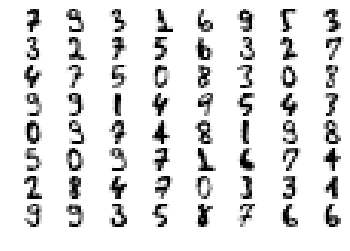

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 3)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T.tolist() 

In [7]:
classes = []
for i in range(2**(10-1) - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.59023 stdev: 0.28061
Best fitness: 0.95300 - size: (2, 13) - species 1 - id 136
Average adjusted fitness: 0.487
Mean genetic distance 2.970, standard deviation 0.496
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 18.578 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.72566 stdev: 0.24277
Best fitness: 0.95300 - size: (2, 13) - species 5 - id 136
Average adjusted fitness: 0.606
Mean genetic distance 3.047, standard deviation 0.504
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 27.077 sec (22.828 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.76711 stdev: 0.21174
Best fitness: 0.96784 - size: (3, 14) - species 30 - id 538
Average adjusted fitness: 0.652
Mean genetic distance 3.084, standard deviation 0.512
Population of 207 members in 33 species
Total exti

Mean genetic distance 3.044, standard deviation 0.500
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 43.613 sec (42.629 average)
number of class1:325
number of class2:1292

 ****** Running generation 0 ****** 

Population's average fitness: 0.55814 stdev: 0.21066
Best fitness: 0.82931 - size: (2, 13) - species 7 - id 115
Average adjusted fitness: 0.376
Mean genetic distance 2.882, standard deviation 0.479
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 33.734 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67102 stdev: 0.17915
Best fitness: 0.87322 - size: (2, 14) - species 3 - id 313
Average adjusted fitness: 0.489
Mean genetic distance 3.015, standard deviation 0.480
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 37.486 sec (35.610 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.72049 stdev: 0.13328
Best fitness: 0.88559 - size: (3, 16

Population's average fitness: 0.53936 stdev: 0.05879
Best fitness: 0.70068 - size: (2, 13) - species 26 - id 180
Average adjusted fitness: 0.167
Mean genetic distance 3.041, standard deviation 0.485
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 27.550 sec (27.304 average)
number of class1:326
number of class2:1291

 ****** Running generation 0 ****** 

Population's average fitness: 0.57290 stdev: 0.19725
Best fitness: 0.85096 - size: (2, 13) - species 8 - id 83
Average adjusted fitness: 0.401
Mean genetic distance 2.897, standard deviation 0.461
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 24.378 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65968 stdev: 0.19181
Best fitness: 0.86951 - size: (3, 15) - species 3 - id 356
Average adjusted fitness: 0.396
Mean genetic distance 3.018, standard deviation 0.484
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 26.230 sec (

Mean genetic distance 2.912, standard deviation 0.456
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 27.660 sec (26.258 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53409 stdev: 0.07459
Best fitness: 0.72047 - size: (2, 14) - species 4 - id 268
Average adjusted fitness: 0.228
Mean genetic distance 2.908, standard deviation 0.451
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 27.643 sec (26.720 average)
number of class1:489
number of class2:1128

 ****** Running generation 0 ****** 

Population's average fitness: 0.53359 stdev: 0.15079
Best fitness: 0.84725 - size: (2, 13) - species 5 - id 135
Average adjusted fitness: 0.322
Mean genetic distance 2.907, standard deviation 0.468
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 24.678 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60056 stdev: 0.14947
Best fitness: 0.84725 - size: (2, 13

Population's average fitness: 0.54728 stdev: 0.09048
Best fitness: 0.74088 - size: (2, 13) - species 1 - id 114
Average adjusted fitness: 0.197
Mean genetic distance 2.973, standard deviation 0.490
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 25.694 sec (25.113 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55870 stdev: 0.09533
Best fitness: 0.74706 - size: (4, 17) - species 13 - id 521
Average adjusted fitness: 0.243
Mean genetic distance 3.017, standard deviation 0.513
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 27.214 sec (25.813 average)
number of class1:323
number of class2:1294

 ****** Running generation 0 ****** 

Population's average fitness: 0.56588 stdev: 0.21638
Best fitness: 0.84663 - size: (2, 13) - species 1 - id 162
Average adjusted fitness: 0.414
Mean genetic distance 2.901, standard deviation 0.462
Population of 199 members in 23 species
Total extinctions: 0
Generation 

Mean genetic distance 2.921, standard deviation 0.470
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 24.575 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52710 stdev: 0.07484
Best fitness: 0.74026 - size: (3, 15) - species 4 - id 386
Average adjusted fitness: 0.268
Mean genetic distance 3.010, standard deviation 0.466
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 25.899 sec (25.237 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55633 stdev: 0.07889
Best fitness: 0.74521 - size: (4, 16) - species 4 - id 529
Average adjusted fitness: 0.262
Mean genetic distance 3.049, standard deviation 0.466
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 27.470 sec (25.981 average)
number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.53333 stdev: 0.15289
Best fitness: 0.78602 - size: (2, 13


 ****** Running generation 0 ****** 

Population's average fitness: 0.48492 stdev: 0.09842
Best fitness: 0.70563 - size: (2, 13) - species 1 - id 15
Average adjusted fitness: 0.176
Mean genetic distance 2.926, standard deviation 0.473
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 24.631 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52471 stdev: 0.09782
Best fitness: 0.72975 - size: (3, 15) - species 5 - id 326
Average adjusted fitness: 0.209
Mean genetic distance 3.028, standard deviation 0.464
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 26.157 sec (25.394 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56069 stdev: 0.09835
Best fitness: 0.76438 - size: (4, 16) - species 14 - id 392
Average adjusted fitness: 0.367
Mean genetic distance 3.099, standard deviation 0.459
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 28.384 sec (26.3

Mean genetic distance 3.096, standard deviation 0.489
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 28.184 sec (26.849 average)
number of class1:966
number of class2:651

 ****** Running generation 0 ****** 

Population's average fitness: 0.47637 stdev: 0.09578
Best fitness: 0.73593 - size: (2, 13) - species 4 - id 192
Average adjusted fitness: 0.286
Mean genetic distance 2.796, standard deviation 0.418
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 25.330 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53928 stdev: 0.10315
Best fitness: 0.73593 - size: (2, 13) - species 1 - id 192
Average adjusted fitness: 0.230
Mean genetic distance 2.954, standard deviation 0.474
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 27.029 sec (26.179 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56789 stdev: 0.10120
Best fitness: 0.77551 - size: (3, 15)

Population's average fitness: 0.56272 stdev: 0.11363
Best fitness: 0.81200 - size: (4, 17) - species 6 - id 532
Average adjusted fitness: 0.311
Mean genetic distance 2.978, standard deviation 0.455
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 28.271 sec (26.638 average)
number of class1:1129
number of class2:488

 ****** Running generation 0 ****** 

Population's average fitness: 0.46219 stdev: 0.14745
Best fitness: 0.73779 - size: (2, 13) - species 7 - id 63
Average adjusted fitness: 0.222
Mean genetic distance 2.869, standard deviation 0.509
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 24.570 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55540 stdev: 0.14932
Best fitness: 0.78664 - size: (2, 13) - species 14 - id 355
Average adjusted fitness: 0.267
Mean genetic distance 2.896, standard deviation 0.484
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 26.331 sec (

Mean genetic distance 2.958, standard deviation 0.443
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 29.175 sec (28.795 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56752 stdev: 0.08767
Best fitness: 0.70686 - size: (2, 13) - species 18 - id 486
Average adjusted fitness: 0.180
Mean genetic distance 3.006, standard deviation 0.460
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 30.195 sec (29.262 average)
number of class1:806
number of class2:811

 ****** Running generation 0 ****** 

Population's average fitness: 0.50081 stdev: 0.07207
Best fitness: 0.79159 - size: (2, 13) - species 3 - id 180
Average adjusted fitness: 0.249
Mean genetic distance 2.869, standard deviation 0.500
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 24.365 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54151 stdev: 0.08693
Best fitness: 0.81076 - size: (3, 14

Population's average fitness: 0.52802 stdev: 0.04802
Best fitness: 0.65739 - size: (3, 15) - species 7 - id 250
Average adjusted fitness: 0.157
Mean genetic distance 2.924, standard deviation 0.493
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 25.847 sec (24.964 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53755 stdev: 0.05223
Best fitness: 0.68893 - size: (3, 16) - species 8 - id 428
Average adjusted fitness: 0.123
Mean genetic distance 2.943, standard deviation 0.472
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 27.219 sec (25.716 average)
number of class1:969
number of class2:648

 ****** Running generation 0 ****** 

Population's average fitness: 0.49908 stdev: 0.09220
Best fitness: 0.74212 - size: (2, 13) - species 2 - id 39
Average adjusted fitness: 0.191
Mean genetic distance 2.800, standard deviation 0.459
Population of 199 members in 20 species
Total extinctions: 0
Generation tim

Mean genetic distance 2.923, standard deviation 0.510
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 24.341 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54438 stdev: 0.06698
Best fitness: 0.70192 - size: (2, 13) - species 1 - id 58
Average adjusted fitness: 0.171
Mean genetic distance 3.020, standard deviation 0.488
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 25.870 sec (25.105 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55384 stdev: 0.06546
Best fitness: 0.70192 - size: (2, 13) - species 21 - id 58
Average adjusted fitness: 0.180
Mean genetic distance 3.013, standard deviation 0.489
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 29.116 sec (26.442 average)
number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.49308 stdev: 0.10363
Best fitness: 0.78108 - size: (2, 13) 


 ****** Running generation 0 ****** 

Population's average fitness: 0.48444 stdev: 0.08895
Best fitness: 0.70192 - size: (2, 13) - species 4 - id 168
Average adjusted fitness: 0.166
Mean genetic distance 2.938, standard deviation 0.473
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 25.199 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53585 stdev: 0.08630
Best fitness: 0.70192 - size: (2, 13) - species 9 - id 168
Average adjusted fitness: 0.216
Mean genetic distance 3.026, standard deviation 0.476
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 27.885 sec (26.542 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54557 stdev: 0.09088
Best fitness: 0.70192 - size: (2, 13) - species 20 - id 168
Average adjusted fitness: 0.233
Mean genetic distance 3.080, standard deviation 0.481
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 28.001 sec (27.

Mean genetic distance 3.040, standard deviation 0.494
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 28.182 sec (26.206 average)
number of class1:805
number of class2:812

 ****** Running generation 0 ****** 

Population's average fitness: 0.50371 stdev: 0.05368
Best fitness: 0.69326 - size: (2, 13) - species 1 - id 17
Average adjusted fitness: 0.183
Mean genetic distance 2.928, standard deviation 0.486
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 24.746 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52599 stdev: 0.05334
Best fitness: 0.70068 - size: (3, 14) - species 2 - id 302
Average adjusted fitness: 0.197
Mean genetic distance 2.947, standard deviation 0.489
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 26.033 sec (25.390 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53167 stdev: 0.05883
Best fitness: 0.70068 - size: (3, 14) 

Population's average fitness: 0.56165 stdev: 0.09324
Best fitness: 0.79592 - size: (3, 15) - species 5 - id 377
Average adjusted fitness: 0.303
Mean genetic distance 3.008, standard deviation 0.516
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 27.389 sec (26.075 average)
number of class1:968
number of class2:649

 ****** Running generation 0 ****** 

Population's average fitness: 0.47182 stdev: 0.08463
Best fitness: 0.70192 - size: (2, 13) - species 4 - id 93
Average adjusted fitness: 0.209
Mean genetic distance 2.920, standard deviation 0.479
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 24.312 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52874 stdev: 0.09066
Best fitness: 0.72975 - size: (3, 15) - species 1 - id 279
Average adjusted fitness: 0.207
Mean genetic distance 2.998, standard deviation 0.479
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 25.515 sec (24

Mean genetic distance 2.988, standard deviation 0.482
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 28.055 sec (26.264 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56465 stdev: 0.09480
Best fitness: 0.73655 - size: (4, 17) - species 19 - id 436
Average adjusted fitness: 0.259
Mean genetic distance 3.035, standard deviation 0.468
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 27.066 sec (26.531 average)
number of class1:969
number of class2:648

 ****** Running generation 0 ****** 

Population's average fitness: 0.47514 stdev: 0.08168
Best fitness: 0.67100 - size: (2, 13) - species 2 - id 182
Average adjusted fitness: 0.154
Mean genetic distance 2.807, standard deviation 0.457
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 24.598 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53383 stdev: 0.09220
Best fitness: 0.70068 - size: (3, 15

Population's average fitness: 0.55273 stdev: 0.14300
Best fitness: 0.78355 - size: (2, 13) - species 1 - id 169
Average adjusted fitness: 0.302
Mean genetic distance 3.042, standard deviation 0.467
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 22.382 sec (21.993 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59761 stdev: 0.13478
Best fitness: 0.80705 - size: (4, 16) - species 17 - id 506
Average adjusted fitness: 0.310
Mean genetic distance 3.082, standard deviation 0.488
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 23.678 sec (22.555 average)
number of class1:1132
number of class2:485

 ****** Running generation 0 ****** 

Population's average fitness: 0.46711 stdev: 0.14707
Best fitness: 0.73717 - size: (2, 13) - species 1 - id 3
Average adjusted fitness: 0.197
Mean genetic distance 2.919, standard deviation 0.469
Population of 200 members in 24 species
Total extinctions: 0
Generation ti

Mean genetic distance 2.880, standard deviation 0.442
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.730 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57101 stdev: 0.07632
Best fitness: 0.69573 - size: (3, 14) - species 1 - id 309
Average adjusted fitness: 0.246
Mean genetic distance 2.952, standard deviation 0.462
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 18.461 sec (18.095 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57695 stdev: 0.08360
Best fitness: 0.71985 - size: (3, 16) - species 7 - id 479
Average adjusted fitness: 0.260
Mean genetic distance 2.976, standard deviation 0.460
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 19.782 sec (18.657 average)
number of class1:639
number of class2:978

 ****** Running generation 0 ****** 

Population's average fitness: 0.52182 stdev: 0.08528
Best fitness: 0.67532 - size: (2, 13)


 ****** Running generation 0 ****** 

Population's average fitness: 0.49711 stdev: 0.05418
Best fitness: 0.65306 - size: (2, 13) - species 3 - id 55
Average adjusted fitness: 0.140
Mean genetic distance 2.909, standard deviation 0.423
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 17.823 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52749 stdev: 0.05268
Best fitness: 0.67842 - size: (3, 15) - species 27 - id 344
Average adjusted fitness: 0.147
Mean genetic distance 2.964, standard deviation 0.450
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 19.044 sec (18.434 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54436 stdev: 0.05524
Best fitness: 0.69079 - size: (4, 16) - species 14 - id 498
Average adjusted fitness: 0.139
Mean genetic distance 2.898, standard deviation 0.459
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 19.346 sec (18.

Mean genetic distance 3.097, standard deviation 0.535
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 19.458 sec (18.541 average)
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.50290 stdev: 0.05834
Best fitness: 0.65739 - size: (2, 13) - species 1 - id 27
Average adjusted fitness: 0.200
Mean genetic distance 2.880, standard deviation 0.449
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 17.877 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53143 stdev: 0.06346
Best fitness: 0.72542 - size: (3, 15) - species 5 - id 201
Average adjusted fitness: 0.192
Mean genetic distance 2.919, standard deviation 0.443
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 18.554 sec (18.216 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55084 stdev: 0.06506
Best fitness: 0.72542 - size: (3, 15) 

Population's average fitness: 0.53982 stdev: 0.05941
Best fitness: 0.73717 - size: (3, 16) - species 16 - id 448
Average adjusted fitness: 0.153
Mean genetic distance 3.015, standard deviation 0.470
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 20.318 sec (18.900 average)
number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.46821 stdev: 0.08312
Best fitness: 0.63327 - size: (2, 13) - species 5 - id 198
Average adjusted fitness: 0.178
Mean genetic distance 2.806, standard deviation 0.446
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 17.731 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52582 stdev: 0.08250
Best fitness: 0.67904 - size: (2, 14) - species 3 - id 307
Average adjusted fitness: 0.171
Mean genetic distance 2.871, standard deviation 0.472
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 18.827 sec (

Mean genetic distance 3.004, standard deviation 0.487
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 18.746 sec (18.127 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56255 stdev: 0.09664
Best fitness: 0.76252 - size: (3, 14) - species 3 - id 542
Average adjusted fitness: 0.286
Mean genetic distance 3.034, standard deviation 0.489
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 19.774 sec (18.676 average)
number of class1:805
number of class2:812

 ****** Running generation 0 ****** 

Population's average fitness: 0.49631 stdev: 0.05804
Best fitness: 0.72542 - size: (2, 13) - species 1 - id 135
Average adjusted fitness: 0.210
Mean genetic distance 2.858, standard deviation 0.462
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 17.841 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53105 stdev: 0.05680
Best fitness: 0.72542 - size: (2, 13)

Population's average fitness: 0.53696 stdev: 0.07005
Best fitness: 0.76871 - size: (3, 15) - species 2 - id 293
Average adjusted fitness: 0.216
Mean genetic distance 3.009, standard deviation 0.476
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 19.956 sec (18.792 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54829 stdev: 0.07521
Best fitness: 0.76871 - size: (3, 15) - species 11 - id 293
Average adjusted fitness: 0.153
Mean genetic distance 3.090, standard deviation 0.491
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 19.896 sec (19.160 average)
number of class1:968
number of class2:649

 ****** Running generation 0 ****** 

Population's average fitness: 0.48240 stdev: 0.08221
Best fitness: 0.66048 - size: (2, 13) - species 6 - id 51
Average adjusted fitness: 0.163
Mean genetic distance 2.904, standard deviation 0.465
Population of 200 members in 26 species
Total extinctions: 0
Generation ti

Mean genetic distance 2.842, standard deviation 0.452
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 17.322 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53408 stdev: 0.06414
Best fitness: 0.75015 - size: (2, 13) - species 3 - id 194
Average adjusted fitness: 0.150
Mean genetic distance 2.899, standard deviation 0.488
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 18.286 sec (17.804 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55359 stdev: 0.07031
Best fitness: 0.75015 - size: (2, 13) - species 17 - id 194
Average adjusted fitness: 0.157
Mean genetic distance 2.972, standard deviation 0.488
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 19.016 sec (18.208 average)
number of class1:969
number of class2:648

 ****** Running generation 0 ****** 

Population's average fitness: 0.48089 stdev: 0.08887
Best fitness: 0.68151 - size: (2, 13


 ****** Running generation 0 ****** 

Population's average fitness: 0.48111 stdev: 0.09209
Best fitness: 0.73717 - size: (2, 13) - species 7 - id 75
Average adjusted fitness: 0.202
Mean genetic distance 2.921, standard deviation 0.469
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 17.486 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53653 stdev: 0.08955
Best fitness: 0.73717 - size: (2, 13) - species 7 - id 75
Average adjusted fitness: 0.213
Mean genetic distance 2.969, standard deviation 0.499
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 19.381 sec (18.434 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55172 stdev: 0.09042
Best fitness: 0.74892 - size: (4, 16) - species 12 - id 530
Average adjusted fitness: 0.254
Mean genetic distance 3.001, standard deviation 0.494
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 19.085 sec (18.65

Mean genetic distance 3.022, standard deviation 0.479
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 19.471 sec (18.547 average)
number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.52346 stdev: 0.08852
Best fitness: 0.73840 - size: (2, 13) - species 1 - id 200
Average adjusted fitness: 0.179
Mean genetic distance 2.913, standard deviation 0.476
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 17.454 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56271 stdev: 0.08406
Best fitness: 0.73840 - size: (2, 13) - species 1 - id 200
Average adjusted fitness: 0.174
Mean genetic distance 3.045, standard deviation 0.510
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 18.381 sec (17.917 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58679 stdev: 0.09683
Best fitness: 0.77613 - size: (3, 14)

Population's average fitness: 0.55159 stdev: 0.10828
Best fitness: 0.77365 - size: (4, 16) - species 3 - id 455
Average adjusted fitness: 0.255
Mean genetic distance 2.965, standard deviation 0.478
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 19.310 sec (18.440 average)
number of class1:810
number of class2:807

 ****** Running generation 0 ****** 

Population's average fitness: 0.50831 stdev: 0.06012
Best fitness: 0.77798 - size: (2, 13) - species 7 - id 121
Average adjusted fitness: 0.174
Mean genetic distance 2.970, standard deviation 0.504
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 17.528 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55610 stdev: 0.06879
Best fitness: 0.77798 - size: (2, 13) - species 1 - id 121
Average adjusted fitness: 0.207
Mean genetic distance 3.006, standard deviation 0.501
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 19.220 sec (1

Mean genetic distance 3.035, standard deviation 0.511
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 18.809 sec (18.233 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57423 stdev: 0.10418
Best fitness: 0.78293 - size: (2, 13) - species 4 - id 265
Average adjusted fitness: 0.283
Mean genetic distance 3.077, standard deviation 0.495
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 19.583 sec (18.683 average)
number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.50520 stdev: 0.05941
Best fitness: 0.66419 - size: (2, 13) - species 4 - id 82
Average adjusted fitness: 0.220
Mean genetic distance 2.914, standard deviation 0.483
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 17.518 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53333 stdev: 0.07118
Best fitness: 0.72418 - size: (2, 14) 

Population's average fitness: 0.56319 stdev: 0.16073
Best fitness: 0.80396 - size: (3, 15) - species 1 - id 331
Average adjusted fitness: 0.317
Mean genetic distance 3.041, standard deviation 0.486
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 18.827 sec (18.309 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60239 stdev: 0.15033
Best fitness: 0.81447 - size: (4, 16) - species 17 - id 467
Average adjusted fitness: 0.374
Mean genetic distance 3.055, standard deviation 0.480
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 19.678 sec (18.766 average)
number of class1:974
number of class2:643

 ****** Running generation 0 ****** 

Population's average fitness: 0.48121 stdev: 0.08908
Best fitness: 0.68522 - size: (2, 13) - species 1 - id 110
Average adjusted fitness: 0.161
Mean genetic distance 2.903, standard deviation 0.505
Population of 201 members in 22 species
Total extinctions: 0
Generation t

Mean genetic distance 2.803, standard deviation 0.439
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 17.730 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53272 stdev: 0.08760
Best fitness: 0.72727 - size: (3, 15) - species 1 - id 385
Average adjusted fitness: 0.187
Mean genetic distance 2.931, standard deviation 0.448
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 18.687 sec (18.209 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55908 stdev: 0.08820
Best fitness: 0.72727 - size: (3, 15) - species 1 - id 385
Average adjusted fitness: 0.216
Mean genetic distance 3.047, standard deviation 0.489
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 20.204 sec (18.874 average)
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.50281 stdev: 0.04763
Best fitness: 0.66357 - size: (2, 13)


 ****** Running generation 0 ****** 

Population's average fitness: 0.46963 stdev: 0.15279
Best fitness: 0.76747 - size: (2, 13) - species 2 - id 92
Average adjusted fitness: 0.227
Mean genetic distance 2.805, standard deviation 0.435
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 17.866 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54385 stdev: 0.15408
Best fitness: 0.76871 - size: (2, 13) - species 16 - id 319
Average adjusted fitness: 0.307
Mean genetic distance 2.918, standard deviation 0.465
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 18.677 sec (18.272 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61653 stdev: 0.12878
Best fitness: 0.79777 - size: (3, 15) - species 21 - id 518
Average adjusted fitness: 0.349
Mean genetic distance 2.954, standard deviation 0.478
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 19.536 sec (18.

Mean genetic distance 3.017, standard deviation 0.471
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 19.549 sec (18.623 average)
number of class1:1131
number of class2:486

 ****** Running generation 0 ****** 

Population's average fitness: 0.47252 stdev: 0.15437
Best fitness: 0.75819 - size: (2, 13) - species 5 - id 66
Average adjusted fitness: 0.247
Mean genetic distance 2.895, standard deviation 0.494
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 17.874 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55451 stdev: 0.15092
Best fitness: 0.75819 - size: (2, 13) - species 3 - id 66
Average adjusted fitness: 0.286
Mean genetic distance 2.997, standard deviation 0.522
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 18.543 sec (18.208 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59245 stdev: 0.14086
Best fitness: 0.75819 - size: (2, 13) 

Population's average fitness: 0.60841 stdev: 0.14086
Best fitness: 0.75819 - size: (3, 15) - species 8 - id 507
Average adjusted fitness: 0.341
Mean genetic distance 3.066, standard deviation 0.494
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 20.194 sec (18.722 average)
number of class1:1294
number of class2:323

 ****** Running generation 0 ****** 

Population's average fitness: 0.43841 stdev: 0.20542
Best fitness: 0.85034 - size: (2, 13) - species 5 - id 108
Average adjusted fitness: 0.231
Mean genetic distance 2.818, standard deviation 0.434
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 17.438 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59772 stdev: 0.20234
Best fitness: 0.85034 - size: (2, 13) - species 3 - id 108
Average adjusted fitness: 0.384
Mean genetic distance 2.971, standard deviation 0.477
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 18.734 sec (

Mean genetic distance 2.957, standard deviation 0.477
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 18.893 sec (18.313 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62392 stdev: 0.11528
Best fitness: 0.75077 - size: (3, 15) - species 11 - id 462
Average adjusted fitness: 0.355
Mean genetic distance 2.994, standard deviation 0.481
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 20.429 sec (19.018 average)
number of class1:644
number of class2:973

 ****** Running generation 0 ****** 

Population's average fitness: 0.52143 stdev: 0.08104
Best fitness: 0.66481 - size: (2, 13) - species 7 - id 160
Average adjusted fitness: 0.221
Mean genetic distance 2.901, standard deviation 0.496
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 17.647 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55158 stdev: 0.07415
Best fitness: 0.66481 - size: (2, 13

Population's average fitness: 0.56812 stdev: 0.07456
Best fitness: 0.69450 - size: (2, 14) - species 11 - id 329
Average adjusted fitness: 0.203
Mean genetic distance 3.028, standard deviation 0.464
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 18.926 sec (18.244 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55874 stdev: 0.08617
Best fitness: 0.71429 - size: (4, 16) - species 20 - id 498
Average adjusted fitness: 0.234
Mean genetic distance 3.015, standard deviation 0.452
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 19.449 sec (18.645 average)
number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.50507 stdev: 0.05844
Best fitness: 0.66419 - size: (2, 13) - species 3 - id 125
Average adjusted fitness: 0.175
Mean genetic distance 2.845, standard deviation 0.442
Population of 199 members in 22 species
Total extinctions: 0
Generation 

Mean genetic distance 2.858, standard deviation 0.482
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 17.545 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55401 stdev: 0.07503
Best fitness: 0.69388 - size: (3, 14) - species 2 - id 324
Average adjusted fitness: 0.180
Mean genetic distance 3.008, standard deviation 0.511
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 18.604 sec (18.074 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55712 stdev: 0.07744
Best fitness: 0.69388 - size: (3, 14) - species 2 - id 324
Average adjusted fitness: 0.201
Mean genetic distance 3.104, standard deviation 0.491
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 20.351 sec (18.833 average)
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.49335 stdev: 0.06015
Best fitness: 0.65182 - size: (2, 13)


 ****** Running generation 0 ****** 

Population's average fitness: 0.49971 stdev: 0.06230
Best fitness: 0.68584 - size: (2, 13) - species 1 - id 11
Average adjusted fitness: 0.185
Mean genetic distance 2.890, standard deviation 0.514
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 17.708 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52287 stdev: 0.06241
Best fitness: 0.68831 - size: (3, 14) - species 2 - id 241
Average adjusted fitness: 0.172
Mean genetic distance 3.003, standard deviation 0.518
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 18.636 sec (18.172 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53259 stdev: 0.06449
Best fitness: 0.68831 - size: (3, 14) - species 14 - id 241
Average adjusted fitness: 0.186
Mean genetic distance 3.083, standard deviation 0.520
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 19.553 sec (18.6

Mean genetic distance 3.005, standard deviation 0.482
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 20.428 sec (18.856 average)
number of class1:643
number of class2:974

 ****** Running generation 0 ****** 

Population's average fitness: 0.51270 stdev: 0.09210
Best fitness: 0.71614 - size: (2, 13) - species 5 - id 172
Average adjusted fitness: 0.235
Mean genetic distance 2.963, standard deviation 0.514
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 17.700 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57122 stdev: 0.08380
Best fitness: 0.74644 - size: (3, 14) - species 4 - id 283
Average adjusted fitness: 0.280
Mean genetic distance 3.079, standard deviation 0.514
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 18.895 sec (18.297 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58488 stdev: 0.08330
Best fitness: 0.74644 - size: (3, 14)

Population's average fitness: 0.56268 stdev: 0.08243
Best fitness: 0.76871 - size: (2, 14) - species 3 - id 427
Average adjusted fitness: 0.168
Mean genetic distance 3.085, standard deviation 0.500
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 19.644 sec (18.715 average)
number of class1:806
number of class2:811

 ****** Running generation 0 ****** 

Population's average fitness: 0.50011 stdev: 0.08200
Best fitness: 0.78231 - size: (2, 13) - species 6 - id 192
Average adjusted fitness: 0.233
Mean genetic distance 2.781, standard deviation 0.444
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 17.453 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54375 stdev: 0.09407
Best fitness: 0.78231 - size: (2, 13) - species 6 - id 192
Average adjusted fitness: 0.249
Mean genetic distance 2.898, standard deviation 0.475
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 18.359 sec (1

Mean genetic distance 2.972, standard deviation 0.515
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 19.391 sec (18.575 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54508 stdev: 0.06593
Best fitness: 0.72604 - size: (2, 14) - species 1 - id 429
Average adjusted fitness: 0.206
Mean genetic distance 3.031, standard deviation 0.531
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 21.220 sec (19.457 average)
number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.49828 stdev: 0.05958
Best fitness: 0.67038 - size: (2, 13) - species 4 - id 200
Average adjusted fitness: 0.166
Mean genetic distance 2.832, standard deviation 0.449
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 17.720 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52562 stdev: 0.06584
Best fitness: 0.68955 - size: (2, 13)

Population's average fitness: 0.55704 stdev: 0.10344
Best fitness: 0.79716 - size: (3, 15) - species 3 - id 202
Average adjusted fitness: 0.328
Mean genetic distance 3.037, standard deviation 0.518
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 18.523 sec (18.038 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57670 stdev: 0.10528
Best fitness: 0.79716 - size: (3, 15) - species 3 - id 202
Average adjusted fitness: 0.321
Mean genetic distance 3.095, standard deviation 0.502
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 19.798 sec (18.625 average)
number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.47645 stdev: 0.10648
Best fitness: 0.79963 - size: (2, 13) - species 6 - id 78
Average adjusted fitness: 0.273
Mean genetic distance 2.851, standard deviation 0.456
Population of 200 members in 25 species
Total extinctions: 0
Generation tim

Mean genetic distance 2.984, standard deviation 0.474
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 19.082 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57391 stdev: 0.09401
Best fitness: 0.77922 - size: (3, 15) - species 18 - id 309
Average adjusted fitness: 0.373
Mean genetic distance 2.999, standard deviation 0.465
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 18.840 sec (18.961 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59463 stdev: 0.09735
Best fitness: 0.78973 - size: (3, 16) - species 22 - id 500
Average adjusted fitness: 0.393
Mean genetic distance 2.992, standard deviation 0.474
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 20.765 sec (19.562 average)
number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.52508 stdev: 0.07416
Best fitness: 0.65801 - size: (2, 1


 ****** Running generation 0 ****** 

Population's average fitness: 0.50238 stdev: 0.05870
Best fitness: 0.70006 - size: (2, 13) - species 4 - id 140
Average adjusted fitness: 0.185
Mean genetic distance 2.849, standard deviation 0.514
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 17.487 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53348 stdev: 0.06231
Best fitness: 0.71305 - size: (2, 14) - species 3 - id 337
Average adjusted fitness: 0.128
Mean genetic distance 2.931, standard deviation 0.551
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 18.733 sec (18.110 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55216 stdev: 0.08160
Best fitness: 0.71367 - size: (2, 13) - species 4 - id 527
Average adjusted fitness: 0.208
Mean genetic distance 3.003, standard deviation 0.564
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 19.272 sec (18.4

Mean genetic distance 2.947, standard deviation 0.497
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 19.181 sec (18.425 average)
number of class1:816
number of class2:801

 ****** Running generation 0 ****** 

Population's average fitness: 0.49961 stdev: 0.06218
Best fitness: 0.73284 - size: (2, 13) - species 7 - id 120
Average adjusted fitness: 0.296
Mean genetic distance 2.936, standard deviation 0.505
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 17.650 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53911 stdev: 0.07852
Best fitness: 0.77242 - size: (2, 14) - species 2 - id 250
Average adjusted fitness: 0.219
Mean genetic distance 2.993, standard deviation 0.505
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 19.135 sec (18.393 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55683 stdev: 0.08600
Best fitness: 0.80829 - size: (2, 13)

Population's average fitness: 0.54855 stdev: 0.06226
Best fitness: 0.67347 - size: (3, 15) - species 25 - id 502
Average adjusted fitness: 0.179
Mean genetic distance 3.086, standard deviation 0.493
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 19.213 sec (18.544 average)
number of class1:979
number of class2:638

 ****** Running generation 0 ****** 

Population's average fitness: 0.48551 stdev: 0.09758
Best fitness: 0.72294 - size: (2, 13) - species 1 - id 102
Average adjusted fitness: 0.203
Mean genetic distance 2.868, standard deviation 0.443
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 17.607 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53938 stdev: 0.09462
Best fitness: 0.72294 - size: (2, 13) - species 3 - id 102
Average adjusted fitness: 0.216
Mean genetic distance 2.979, standard deviation 0.451
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 18.507 sec (

Mean genetic distance 2.946, standard deviation 0.481
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 18.529 sec (17.977 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57810 stdev: 0.07002
Best fitness: 0.70130 - size: (4, 15) - species 11 - id 408
Average adjusted fitness: 0.226
Mean genetic distance 2.931, standard deviation 0.453
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 19.761 sec (18.572 average)
number of class1:813
number of class2:804

 ****** Running generation 0 ****** 

Population's average fitness: 0.50849 stdev: 0.05732
Best fitness: 0.68584 - size: (2, 13) - species 3 - id 47
Average adjusted fitness: 0.221
Mean genetic distance 2.866, standard deviation 0.462
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.608 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53330 stdev: 0.06457
Best fitness: 0.70254 - size: (3, 15)

Population's average fitness: 0.54072 stdev: 0.06205
Best fitness: 0.70934 - size: (3, 14) - species 4 - id 352
Average adjusted fitness: 0.199
Mean genetic distance 2.971, standard deviation 0.487
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 18.787 sec (18.140 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54886 stdev: 0.07143
Best fitness: 0.70934 - size: (3, 14) - species 17 - id 352
Average adjusted fitness: 0.284
Mean genetic distance 3.046, standard deviation 0.498
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 19.939 sec (18.740 average)
number of class1:976
number of class2:641

 ****** Running generation 0 ****** 

Population's average fitness: 0.46637 stdev: 0.08866
Best fitness: 0.70254 - size: (2, 13) - species 2 - id 5
Average adjusted fitness: 0.174
Mean genetic distance 2.880, standard deviation 0.464
Population of 201 members in 24 species
Total extinctions: 0
Generation tim

Mean genetic distance 2.866, standard deviation 0.445
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 17.471 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51743 stdev: 0.04770
Best fitness: 0.64440 - size: (3, 14) - species 8 - id 383
Average adjusted fitness: 0.132
Mean genetic distance 3.041, standard deviation 0.459
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 18.839 sec (18.155 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52323 stdev: 0.04841
Best fitness: 0.66976 - size: (4, 17) - species 26 - id 535
Average adjusted fitness: 0.098
Mean genetic distance 3.029, standard deviation 0.467
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 19.734 sec (18.681 average)
number of class1:977
number of class2:640

 ****** Running generation 0 ****** 

Population's average fitness: 0.47883 stdev: 0.09345
Best fitness: 0.69202 - size: (2, 13


 ****** Running generation 0 ****** 

Population's average fitness: 0.48313 stdev: 0.08983
Best fitness: 0.66481 - size: (2, 13) - species 3 - id 10
Average adjusted fitness: 0.203
Mean genetic distance 2.900, standard deviation 0.506
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 17.489 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53232 stdev: 0.09173
Best fitness: 0.69573 - size: (3, 15) - species 14 - id 263
Average adjusted fitness: 0.198
Mean genetic distance 2.990, standard deviation 0.512
Population of 204 members in 22 species
Total extinctions: 0
Generation time: 18.681 sec (18.085 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54985 stdev: 0.08324
Best fitness: 0.69635 - size: (3, 16) - species 21 - id 486
Average adjusted fitness: 0.180
Mean genetic distance 3.063, standard deviation 0.522
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 19.265 sec (18.

Mean genetic distance 3.017, standard deviation 0.467
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 19.373 sec (18.653 average)
number of class1:485
number of class2:1132

 ****** Running generation 0 ****** 

Population's average fitness: 0.54723 stdev: 0.14855
Best fitness: 0.74644 - size: (2, 13) - species 4 - id 47
Average adjusted fitness: 0.299
Mean genetic distance 2.932, standard deviation 0.479
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.550 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62232 stdev: 0.11918
Best fitness: 0.75696 - size: (3, 14) - species 6 - id 370
Average adjusted fitness: 0.339
Mean genetic distance 3.009, standard deviation 0.485
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 18.552 sec (18.051 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63219 stdev: 0.12325
Best fitness: 0.76129 - size: (2, 15)

Population's average fitness: 0.56274 stdev: 0.08814
Best fitness: 0.78108 - size: (2, 13) - species 19 - id 164
Average adjusted fitness: 0.248
Mean genetic distance 3.015, standard deviation 0.493
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 19.579 sec (18.648 average)
number of class1:648
number of class2:969

 ****** Running generation 0 ****** 

Population's average fitness: 0.51448 stdev: 0.09614
Best fitness: 0.67656 - size: (2, 13) - species 3 - id 93
Average adjusted fitness: 0.223
Mean genetic distance 2.965, standard deviation 0.504
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 17.610 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55769 stdev: 0.08818
Best fitness: 0.70563 - size: (3, 15) - species 23 - id 385
Average adjusted fitness: 0.234
Mean genetic distance 3.035, standard deviation 0.488
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 18.807 sec (

Mean genetic distance 2.906, standard deviation 0.444
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 18.536 sec (18.133 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61295 stdev: 0.12557
Best fitness: 0.79406 - size: (2, 14) - species 1 - id 372
Average adjusted fitness: 0.311
Mean genetic distance 2.988, standard deviation 0.434
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 19.713 sec (18.660 average)
number of class1:649
number of class2:968

 ****** Running generation 0 ****** 

Population's average fitness: 0.51892 stdev: 0.08270
Best fitness: 0.68460 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.182
Mean genetic distance 2.922, standard deviation 0.498
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 17.270 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56543 stdev: 0.08297
Best fitness: 0.73346 - size: (3, 14) -

Population's average fitness: 0.56721 stdev: 0.14926
Best fitness: 0.81880 - size: (2, 14) - species 9 - id 370
Average adjusted fitness: 0.308
Mean genetic distance 3.020, standard deviation 0.518
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 18.600 sec (18.509 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58590 stdev: 0.14064
Best fitness: 0.83241 - size: (2, 14) - species 12 - id 413
Average adjusted fitness: 0.260
Mean genetic distance 3.089, standard deviation 0.522
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 19.932 sec (18.983 average)
number of class1:812
number of class2:805

 ****** Running generation 0 ****** 

Population's average fitness: 0.50550 stdev: 0.06873
Best fitness: 0.72851 - size: (2, 13) - species 1 - id 163
Average adjusted fitness: 0.148
Mean genetic distance 2.925, standard deviation 0.475
Population of 200 members in 22 species
Total extinctions: 0
Generation t

Mean genetic distance 2.856, standard deviation 0.443
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 17.783 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56394 stdev: 0.21044
Best fitness: 0.83241 - size: (2, 13) - species 2 - id 184
Average adjusted fitness: 0.369
Mean genetic distance 2.947, standard deviation 0.473
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 18.366 sec (18.074 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63976 stdev: 0.19296
Best fitness: 0.83735 - size: (3, 16) - species 7 - id 414
Average adjusted fitness: 0.435
Mean genetic distance 2.966, standard deviation 0.491
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 19.254 sec (18.468 average)
number of class1:646
number of class2:971

 ****** Running generation 0 ****** 

Population's average fitness: 0.52046 stdev: 0.09609
Best fitness: 0.69944 - size: (2, 13)


 ****** Running generation 0 ****** 

Population's average fitness: 0.46655 stdev: 0.14153
Best fitness: 0.73408 - size: (2, 13) - species 7 - id 67
Average adjusted fitness: 0.174
Mean genetic distance 2.969, standard deviation 0.499
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 18.407 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55325 stdev: 0.15129
Best fitness: 0.75634 - size: (3, 14) - species 13 - id 266
Average adjusted fitness: 0.274
Mean genetic distance 3.027, standard deviation 0.500
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 18.773 sec (18.590 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59506 stdev: 0.13659
Best fitness: 0.75634 - size: (3, 14) - species 13 - id 266
Average adjusted fitness: 0.373
Mean genetic distance 3.050, standard deviation 0.500
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 19.322 sec (18.

Mean genetic distance 3.088, standard deviation 0.493
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 19.625 sec (18.650 average)
number of class1:1288
number of class2:329

 ****** Running generation 0 ****** 

Population's average fitness: 0.42682 stdev: 0.20476
Best fitness: 0.79777 - size: (2, 13) - species 1 - id 82
Average adjusted fitness: 0.245
Mean genetic distance 2.959, standard deviation 0.497
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 17.548 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57069 stdev: 0.20471
Best fitness: 0.82684 - size: (2, 14) - species 7 - id 343
Average adjusted fitness: 0.370
Mean genetic distance 3.017, standard deviation 0.476
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 18.658 sec (18.103 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64539 stdev: 0.18483
Best fitness: 0.82684 - size: (2, 14)

Population's average fitness: 0.58864 stdev: 0.13776
Best fitness: 0.79592 - size: (2, 14) - species 1 - id 249
Average adjusted fitness: 0.315
Mean genetic distance 2.961, standard deviation 0.481
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 20.242 sec (18.759 average)
number of class1:1289
number of class2:328

 ****** Running generation 0 ****** 

Population's average fitness: 0.44672 stdev: 0.21174
Best fitness: 0.80396 - size: (2, 13) - species 2 - id 101
Average adjusted fitness: 0.280
Mean genetic distance 2.974, standard deviation 0.504
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 17.939 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59145 stdev: 0.20756
Best fitness: 0.83488 - size: (3, 14) - species 10 - id 377
Average adjusted fitness: 0.378
Mean genetic distance 3.023, standard deviation 0.477
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 18.552 sec 

Mean genetic distance 3.049, standard deviation 0.498
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 18.544 sec (18.064 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64704 stdev: 0.20001
Best fitness: 0.86395 - size: (3, 16) - species 2 - id 461
Average adjusted fitness: 0.434
Mean genetic distance 3.047, standard deviation 0.486
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 19.610 sec (18.580 average)
number of class1:1452
number of class2:165

 ****** Running generation 0 ****** 

Population's average fitness: 0.37721 stdev: 0.25253
Best fitness: 0.89796 - size: (2, 13) - species 3 - id 53
Average adjusted fitness: 0.296
Mean genetic distance 2.799, standard deviation 0.424
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 17.522 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60480 stdev: 0.25833
Best fitness: 0.89858 - size: (3, 14)

Population's average fitness: 0.52612 stdev: 0.09040
Best fitness: 0.73036 - size: (2, 14) - species 4 - id 351
Average adjusted fitness: 0.231
Mean genetic distance 2.938, standard deviation 0.463
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 18.452 sec (17.923 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54712 stdev: 0.09285
Best fitness: 0.73036 - size: (2, 14) - species 4 - id 351
Average adjusted fitness: 0.220
Mean genetic distance 2.968, standard deviation 0.484
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 18.942 sec (18.262 average)
number of class1:1129
number of class2:488

 ****** Running generation 0 ****** 

Population's average fitness: 0.47378 stdev: 0.15687
Best fitness: 0.79777 - size: (2, 13) - species 2 - id 22
Average adjusted fitness: 0.236
Mean genetic distance 2.869, standard deviation 0.535
Population of 200 members in 17 species
Total extinctions: 0
Generation ti

Mean genetic distance 2.923, standard deviation 0.497
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 17.323 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55982 stdev: 0.15115
Best fitness: 0.73098 - size: (2, 14) - species 7 - id 286
Average adjusted fitness: 0.313
Mean genetic distance 2.961, standard deviation 0.468
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 18.594 sec (17.958 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61109 stdev: 0.12675
Best fitness: 0.76252 - size: (3, 16) - species 1 - id 463
Average adjusted fitness: 0.332
Mean genetic distance 2.994, standard deviation 0.460
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 19.754 sec (18.557 average)
number of class1:1292
number of class2:325

 ****** Running generation 0 ****** 

Population's average fitness: 0.43557 stdev: 0.21244
Best fitness: 0.81694 - size: (2, 13


 ****** Running generation 0 ****** 

Population's average fitness: 0.47151 stdev: 0.15807
Best fitness: 0.76623 - size: (2, 13) - species 6 - id 111
Average adjusted fitness: 0.290
Mean genetic distance 2.903, standard deviation 0.465
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 17.735 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56133 stdev: 0.14888
Best fitness: 0.76623 - size: (2, 13) - species 6 - id 111
Average adjusted fitness: 0.381
Mean genetic distance 2.978, standard deviation 0.477
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 18.580 sec (18.158 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59749 stdev: 0.13778
Best fitness: 0.77613 - size: (2, 13) - species 17 - id 469
Average adjusted fitness: 0.360
Mean genetic distance 2.990, standard deviation 0.514
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 19.696 sec (18.

Mean genetic distance 2.999, standard deviation 0.492
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 19.562 sec (18.581 average)
number of class1:1294
number of class2:323

 ****** Running generation 0 ****** 

Population's average fitness: 0.43362 stdev: 0.20285
Best fitness: 0.81323 - size: (2, 13) - species 3 - id 63
Average adjusted fitness: 0.263
Mean genetic distance 2.906, standard deviation 0.477
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 17.441 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56052 stdev: 0.20849
Best fitness: 0.81509 - size: (3, 14) - species 24 - id 383
Average adjusted fitness: 0.405
Mean genetic distance 3.040, standard deviation 0.497
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 18.536 sec (17.989 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63950 stdev: 0.18874
Best fitness: 0.86271 - size: (4, 15

Population's average fitness: 0.60240 stdev: 0.13514
Best fitness: 0.79963 - size: (3, 16) - species 4 - id 506
Average adjusted fitness: 0.346
Mean genetic distance 2.887, standard deviation 0.454
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 18.981 sec (18.326 average)
number of class1:1128
number of class2:489

 ****** Running generation 0 ****** 

Population's average fitness: 0.45058 stdev: 0.13434
Best fitness: 0.79344 - size: (2, 13) - species 5 - id 144
Average adjusted fitness: 0.177
Mean genetic distance 2.913, standard deviation 0.503
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 17.657 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56833 stdev: 0.13921
Best fitness: 0.79344 - size: (2, 13) - species 3 - id 144
Average adjusted fitness: 0.316
Mean genetic distance 3.026, standard deviation 0.486
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 18.728 sec (

Mean genetic distance 2.970, standard deviation 0.513
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 18.390 sec (18.384 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64051 stdev: 0.18641
Best fitness: 0.81694 - size: (2, 13) - species 21 - id 521
Average adjusted fitness: 0.466
Mean genetic distance 2.995, standard deviation 0.512
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 19.337 sec (18.702 average)
number of class1:1291
number of class2:326

 ****** Running generation 0 ****** 

Population's average fitness: 0.44746 stdev: 0.21593
Best fitness: 0.81942 - size: (2, 13) - species 2 - id 119
Average adjusted fitness: 0.252
Mean genetic distance 2.881, standard deviation 0.470
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 17.818 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58794 stdev: 0.20723
Best fitness: 0.84230 - size: (3, 1

Population's average fitness: 0.58293 stdev: 0.21020
Best fitness: 0.86147 - size: (2, 14) - species 5 - id 235
Average adjusted fitness: 0.350
Mean genetic distance 2.964, standard deviation 0.469
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 18.676 sec (18.111 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64872 stdev: 0.18769
Best fitness: 0.86147 - size: (2, 14) - species 5 - id 235
Average adjusted fitness: 0.432
Mean genetic distance 2.966, standard deviation 0.464
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 19.632 sec (18.618 average)
number of class1:1292
number of class2:325

 ****** Running generation 0 ****** 

Population's average fitness: 0.45464 stdev: 0.21067
Best fitness: 0.82189 - size: (2, 13) - species 2 - id 149
Average adjusted fitness: 0.232
Mean genetic distance 2.929, standard deviation 0.462
Population of 200 members in 26 species
Total extinctions: 0
Generation t

Mean genetic distance 2.935, standard deviation 0.470
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 18.481 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62494 stdev: 0.25439
Best fitness: 0.90291 - size: (3, 15) - species 6 - id 228
Average adjusted fitness: 0.539
Mean genetic distance 3.028, standard deviation 0.498
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 20.528 sec (19.504 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71591 stdev: 0.23733
Best fitness: 0.90600 - size: (4, 15) - species 21 - id 534
Average adjusted fitness: 0.570
Mean genetic distance 3.102, standard deviation 0.494
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 21.062 sec (20.024 average)
number of class1:1455
number of class2:162

 ****** Running generation 0 ****** 

Population's average fitness: 0.41895 stdev: 0.26986
Best fitness: 0.89981 - size: (2, 1

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(len(classes)):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 0.9666666666666667
class1:34/146:class2
Accuracy: 0.9555555555555556
class1:33/147:class2
Accuracy: 0.8833333333333333
class1:51/129:class2
Accuracy: 0.8111111111111111
class1:35/145:class2
Accuracy: 0.8666666666666667
class1:53/127:class2
Accuracy: 0.8444444444444444
class1:52/128:class2
Accuracy: 0.7722222222222223
class1:70/110:class2
Accuracy: 0.7444444444444445
class1:34/146:class2
Accuracy: 0.9166666666666666
class1:52/128:class2
Accuracy: 0.8
class1:51/129:class2
Accuracy: 0.8055555555555556
class1:69/111:class2
Accuracy: 0.6777777777777778
class1:53/127:class2
Accuracy: 0.8
class1:71/109:class2
Accuracy: 0.7222222222222222
class1:70/110:class2
Accuracy: 0.6944444444444444
class1:88/92:class2
Accuracy: 0.7222222222222222
class1:34/146:class2
Accuracy: 0.8666666666666667
class1:52/128:class2
Accuracy: 0.8388888888888889
class1:51/129:class2
Accuracy: 0.7888888888888889
class1:69/111:class2
Accuracy: 0.7611111111111111
class1:53/127:class2
Accuracy: 

Accuracy: 0.6833333333333333
class1:90/90:class2
Accuracy: 0.7611111111111111
class1:108/72:class2
Accuracy: 0.7222222222222222
class1:107/73:class2
Accuracy: 0.6611111111111111
class1:125/55:class2
Accuracy: 0.7277777777777777
class1:89/91:class2
Accuracy: 0.7777777777777778
class1:107/73:class2
Accuracy: 0.8333333333333334
class1:106/74:class2
Accuracy: 0.7777777777777778
class1:124/56:class2
Accuracy: 0.7444444444444445
class1:108/72:class2
Accuracy: 0.7333333333333333
class1:126/54:class2
Accuracy: 0.6777777777777778
class1:125/55:class2
Accuracy: 0.7888888888888889
class1:143/37:class2
Accuracy: 0.8166666666666667
class1:51/129:class2
Accuracy: 0.75
class1:69/111:class2
Accuracy: 0.7611111111111111
class1:68/112:class2
Accuracy: 0.6833333333333333
class1:86/94:class2
Accuracy: 0.6944444444444444
class1:70/110:class2
Accuracy: 0.7277777777777777
class1:88/92:class2
Accuracy: 0.7388888888888889
class1:87/93:class2
Accuracy: 0.7611111111111111
class1:105/75:class2
Accuracy: 0.75
clas

Accuracy: 0.6388888888888888
class1:108/72:class2
Accuracy: 0.6555555555555556
class1:92/88:class2
Accuracy: 0.6555555555555556
class1:110/70:class2
Accuracy: 0.6555555555555556
class1:109/71:class2
Accuracy: 0.8166666666666667
class1:127/53:class2
Accuracy: 0.7833333333333333
class1:91/89:class2
Accuracy: 0.7388888888888889
class1:109/71:class2
Accuracy: 0.65
class1:108/72:class2
Accuracy: 0.7111111111111111
class1:126/54:class2
Accuracy: 0.7611111111111111
class1:110/70:class2
Accuracy: 0.6722222222222223
class1:128/52:class2
Accuracy: 0.7444444444444445
class1:127/53:class2
Accuracy: 0.8111111111111111
class1:145/35:class2
Accuracy: 0.8222222222222222
class1:91/89:class2
Accuracy: 0.6166666666666667
class1:109/71:class2
Accuracy: 0.6611111111111111
class1:108/72:class2
Accuracy: 0.6611111111111111
class1:126/54:class2
Accuracy: 0.7333333333333333
class1:110/70:class2
Accuracy: 0.7555555555555555
class1:128/52:class2
Accuracy: 0.7944444444444444
class1:127/53:class2
Accuracy: 0.78888

In [13]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(511):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(511 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.8611111111111112

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  1  0  0  0  1  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  1 11  0  0  0  0  1  2]
 [ 0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  3  0 18  0  0  1  1]
 [ 0  0  0  1  0  0 18  0  0  0]
 [ 0  2  0  2  1  0  0 19  1  2]
 [ 0  3  0  1  1  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0 13]]


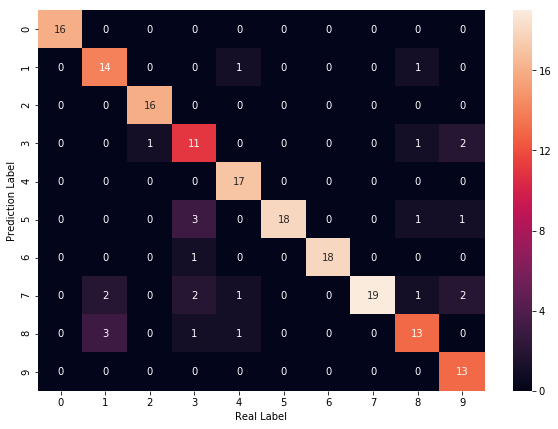

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([16., 16., 16., 15., 17., 23., 19., 27., 18., 13.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:142 index:[5] real:5
#1 min_error:170 index:[3] real:2
#2 min_error:157 index:[8] real:8
#3 min_error:73 index:[0] real:0
#4 min_error:144 index:[1] real:1
#5 min_error:111 index:[7] real:7
#6 min_error:74 index:[6] real:6
#7 min_error:123 index:[3] real:3
#8 min_error:96 index:[2] real:2
#9 min_error:143 index:[1] real:1
#10 min_error:159 index:[7] real:7
#11 min_error:164 index:[7] real:4
#12 min_error:100 index:[6] real:6
#13 min_error:117 index:[3] real:3
#14 min_error:128 index:[1] real:1
#15 min_error:143 index:[3] real:3
#16 min_error:156 index:[7] real:9
#17 min_error:134 index:[1] real:1
#18 min_error:152 index:[7] real:7
#19 min_error:75 index:[6] real:6
#20 min_error:153 index:[8] real:8
#21 min_error:94 index:[4] real:4
#22 min_error:117 index:[3] real:3
#23 min_error:151 index:[1] real:1
#24 min_error:102 index:[4] real:4
#25 min_error:87 index:[0] real:0
#26 min_error:108 index:[5] real:5
#27 min_error:108 index:[3] real:3
#28 min_error:125 index:[6] real:6
#

In [24]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:8021 Total connections::7549
